## Yeo-Johnson Transformation

- An extension of the Box-Cox transformation, can be used on variables with zero, negative, and positive values

$$
x_i^{(\lambda)} =
\begin{cases}
\dfrac{(x_i + 1)^{\lambda} - 1}{\lambda},
& \text{if } \lambda \neq 0,\; x_i \ge 0, \\[6pt]

\ln(x_i + 1),
& \text{if } \lambda = 0,\; x_i \ge 0, \\[6pt]

-\dfrac{(-x_i + 1)^{2 - \lambda} - 1}{2 - \lambda},
& \text{if } \lambda \neq 2,\; x_i < 0, \\[6pt]

-\ln(-x_i + 1),
& \text{if } \lambda = 2,\; x_i < 0
\end{cases}
$$


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PowerTransformer

In [21]:
# func to make histograms
def make_histogram(df):
    df.hist(
        bins=30, 
        figsize=(12,12), 
        layout=(3,3))
    plt.show()

In [14]:
# func to make q-q plots

def make_qqplot(df):
    plt.figure(figsize=(10,6), constrained_layout=True)
    variables = list(df.columns)
    for i in range(len(variables)):
        ax = plt.subplot(2, 3, i+1)
        var = variables[i]

        #q-q plot
        stats.probplot((df[var]), dist="norm", plot=plt)

        ax.set_title(var)

    plt.show()

In [17]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

X.drop(labels=["Latitude", "Longitude"], axis=1, inplace=True)

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


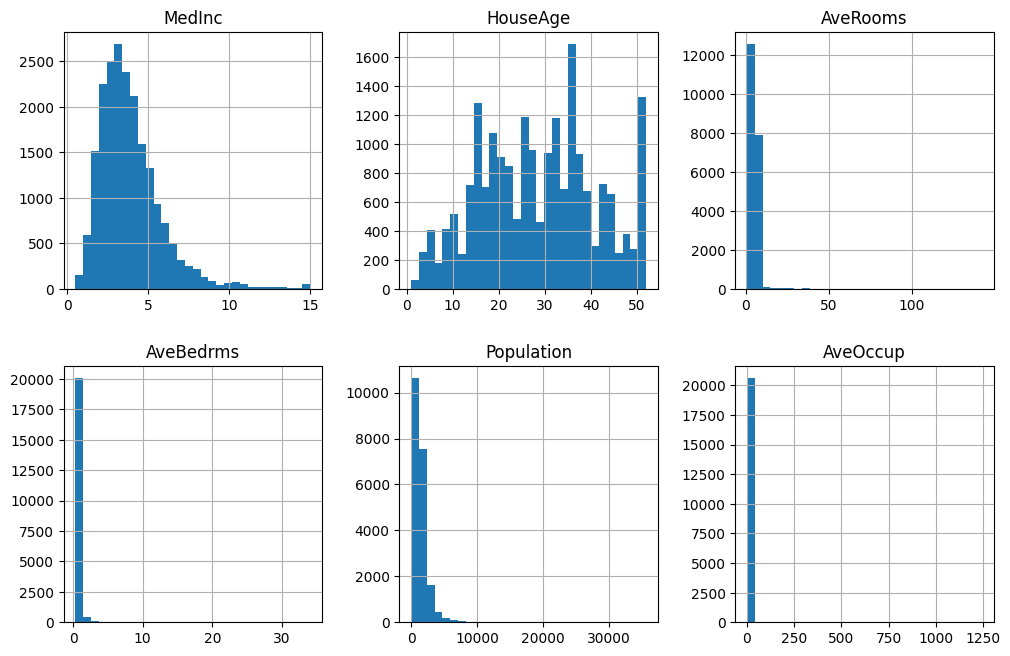

In [22]:
# Inspect variable distribution
make_histogram(X)

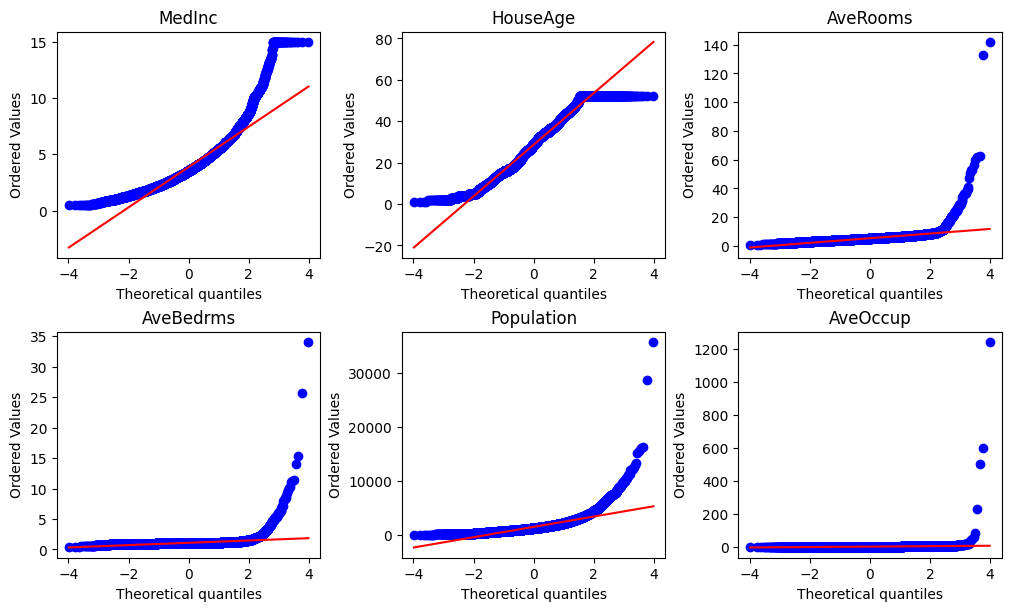

In [23]:
# check normal distribution

make_qqplot(X)

In [24]:
# Initialize yeo-johnson transformer
transformer = PowerTransformer(method="yeo-johnson", standardize=False)
transformer.set_output(transform="pandas")

,method,'yeo-johnson'
,standardize,False
,copy,True


In [25]:
# learn lambdas
transformer.fit(X)

,method,'yeo-johnson'
,standardize,False
,copy,True


In [26]:
transformer.lambdas_

array([-0.19850993,  0.80814805, -0.55366981, -4.3940822 ,  0.23352359,
       -0.90134562])

In [27]:
# transform
X_tf = transformer.transform(X)
X_tf

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,1.803599,24.133441,1.234372,0.217303,12.223222,0.755821
1,1.801958,13.807366,1.202460,0.216060,22.087939,0.710445
2,1.724578,29.380774,1.280312,0.218341,13.970686,0.776570
3,1.578385,29.380774,1.182107,0.218334,14.478723,0.755137
4,1.354895,29.380774,1.204470,0.218489,14.533323,0.718551
...,...,...,...,...,...,...
20635,0.857611,15.981964,1.139177,0.219428,16.384865,0.756273
20636,1.121673,12.126444,1.196652,0.221895,12.613528,0.799990
20637,0.901462,11.555093,1.148759,0.219202,17.247981,0.733858
20638,0.950502,12.126444,1.155919,0.220045,15.761403,0.711984


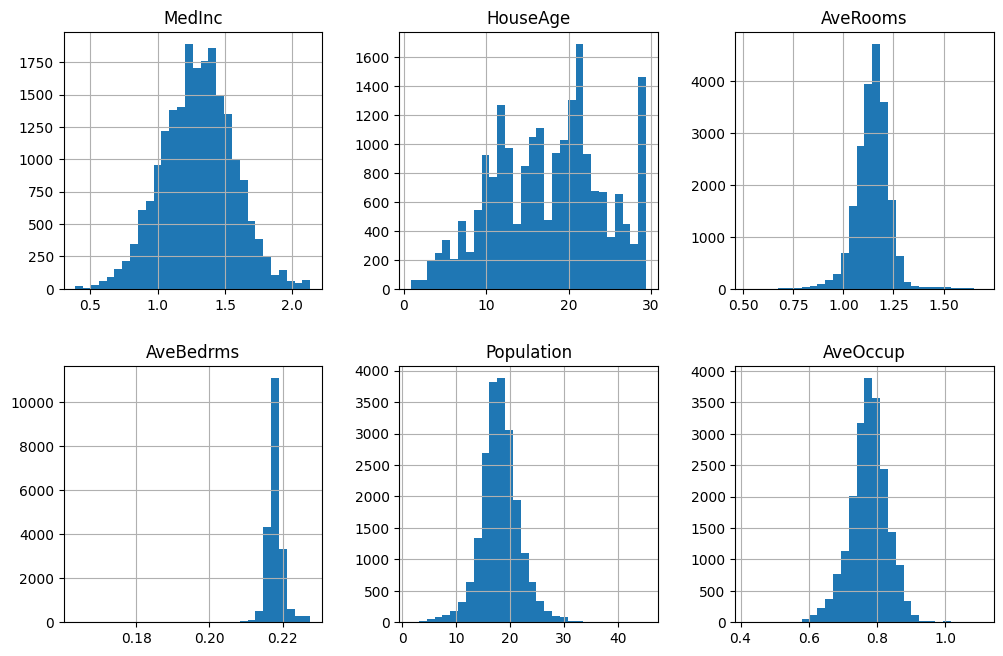

In [28]:
# Inpect variable distribution after transformation
make_histogram(X_tf)

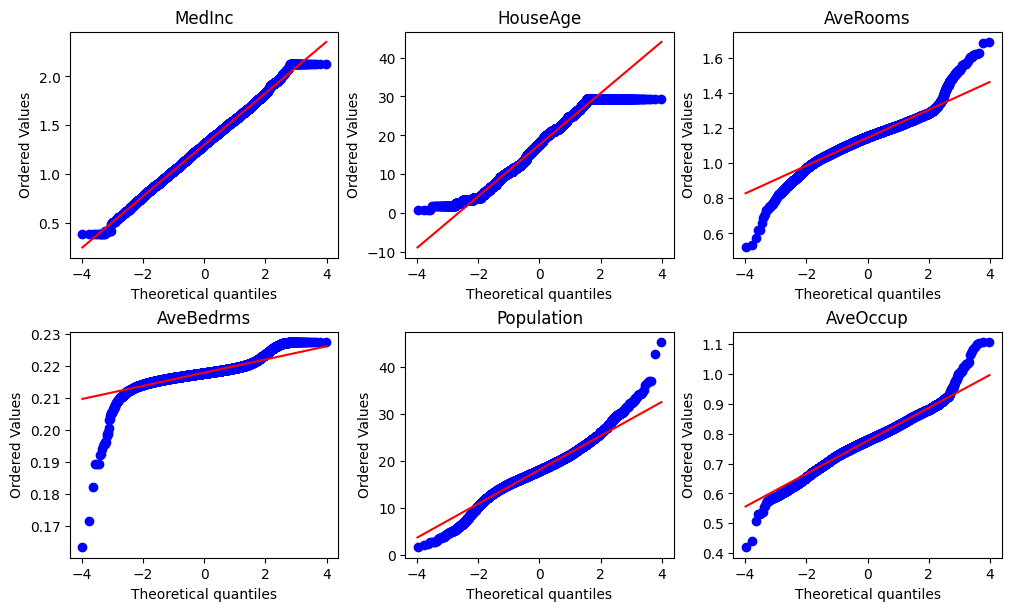

In [29]:
# Check the result of Yeo-Johnson transformation
make_qqplot(X_tf)

We can see that the result is exactly same as doing box-cox transformation. Yeo-Johnson is an upgraded version of Box-Cox